# Projet 4 : Anticipez le retard de vol des avions
# Analyse exploratoire des données

## Contexte

La compagnie AirData souhaite optimiser la logistique et anticiper les retards de vols. Pour celà, elle nous fournit des données de vols de 2016 de différentes compagnies et nous demande de les analyser afin d'implémenter un modèle de prédiction des retards.

**L'objectif** de la mission est donc de faire une analyse exploratoire des données, puis tester différents modèles de prédiction afin d'en séléctionner un afin de l'implémenter dans une API Web de prédiction de retard.

Ce notebook traite de la partie exploratoire des données.

## 1. Importation des librairies

In [1]:
# On importe toutes les librairies nécessaires
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import datetime
import seaborn as sns

%matplotlib inline
plt.style.use('bmh')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 2. Chargement des données sur 1 mois

En raison de la volumétrie, nous commençons pas charger juste 1 mois de données pour faire une première analyse de nos données.

In [2]:
path =r'.' # current dir
datasets_path = glob.glob(path + "/2016*.csv")
total_size = 0
print('# Taille des fichiers')
for f in datasets_path:
    total_size += round(os.path.getsize(f) / 1000000, 2)
    print(f.ljust(30) + str(round(os.path.getsize(f) / 1000000, 2)) + 'MB')
print('# Taille total : ' +  str(round(total_size / 1000, 2)) + 'GB')

# Taille des fichiers
./2016_09.csv                 165.7MB
./2016_08.csv                 181.96MB
./2016_06.csv                 178.1MB
./2016_12.csv                 168.85MB
./2016_07.csv                 183.53MB
./2016_11.csv                 164.68MB
./2016_05.csv                 174.72MB
./2016_04.csv                 174.66MB
./2016_10.csv                 172.38MB
./2016_01.csv                 161.9MB
./2016_03.csv                 174.66MB
./2016_02.csv                 154.14MB
# Taille total : 2.06GB


+ Les données sont réparties dans 12 fichiers (1 par mois pour l'année 2016).<br/>
+ La taille totale des fichiers est de plus de 2 Gb, ce qui est considérable

+ On ignore les lignes qui contiennent des anomalies dans le nombre de colonnes

In [3]:
file_ = '2016_06.csv'
flightsDB = pd.read_csv(file_,index_col=None, header=0,low_memory=False, error_bad_lines=False)

## 3. Analyse rapide des données

### Dimension

In [4]:
flightsDB.shape

(487637, 65)

Le dataset pour 1 mois se compose de 
+ **487 637** lignes
+ et de **65** variables

### Contenu

In [5]:
flightsDB.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
0,2016,2,6,4,6,2016-06-04,DL,19790,DL,N908DL,1138,10397,1039705,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,11193,1119302,33105,CVG,"Cincinnati, OH",KY,21,Kentucky,52,1620,1619.0,-1.0,0.0,0.0,-1.0,1600-1659,18.0,1637.0,1734.0,4.0,1745,1738.0,-7.0,0.0,0.0,-1.0,1700-1759,0.0,NaN,0.0,85.0,79.0,57.0,1.0,373.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,2,6,4,6,2016-06-04,DL,19790,DL,N924DN,1139,11278,1127803,30852,DCA,"Washington, DC",VA,51,Virginia,38,10397,1039705,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,800,757.0,-3.0,0.0,0.0,-1.0,0800-0859,15.0,812.0,931.0,5.0,951,936.0,-15.0,0.0,0.0,-1.0,0900-0959,0.0,NaN,0.0,111.0,99.0,79.0,1.0,547.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,2,6,4,6,2016-06-04,DL,19790,DL,N904DE,1140,10397,1039705,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,13244,1324402,33244,MEM,"Memphis, TN",TN,47,Tennessee,54,2205,2203.0,-2.0,0.0,0.0,-1.0,2200-2259,21.0,2224.0,2216.0,7.0,2225,2223.0,-2.0,0.0,0.0,-1.0,2200-2259,0.0,NaN,0.0,80.0,80.0,52.0,1.0,332.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,2,6,4,6,2016-06-04,DL,19790,DL,N817DN,1143,14122,1412202,30198,PIT,"Pittsburgh, PA",PA,42,Pennsylvania,23,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,640,639.0,-1.0,0.0,0.0,-1.0,0600-0659,24.0,703.0,744.0,5.0,743,749.0,6.0,6.0,0.0,0.0,0700-0759,0.0,NaN,0.0,63.0,70.0,41.0,1.0,201.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,2,6,4,6,2016-06-04,DL,19790,DL,N929DL,1145,10397,1039705,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,13303,1330303,32467,MIA,"Miami, FL",FL,12,Florida,33,1930,1930.0,0.0,0.0,0.0,0.0,1900-1959,16.0,1946.0,2113.0,4.0,2124,2117.0,-7.0,0.0,0.0,-1.0,2100-2159,0.0,NaN,0.0,114.0,107.0,87.0,1.0,594.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nos données contiennent diverses information sur des vols comme la date, l'identifiant de la compagnie, le numéro de vol, l'aéroport de départ et d'arrivée, ... L'ensemble des variable est décrit dans le tableau ci-dessous :

<img src="data-infos.png">

In [6]:
flightsDB.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_ID,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_STATE_FIPS,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST_STATE_FIPS,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
count,487637.0,487637.0,487637.0,487637.000000,487637.000000,487637.000000,487637.000000,487637.000000,4.876370e+05,487637.000000,487637.000000,487637.000000,487637.000000,4.876370e+05,487637.000000,487637.000000,487637.000000,487637.000000,482889.000000,482889.000000,482889.000000,482889.000000,482889.000000,482690.000000,482690.000000,482451.000000,482451.000000,487637.000000,482451.000000,480916.000000,480916.000000,480916.000000,480916.000000,487637.000000,487637.000000,487637.000000,480916.000000,480916.000000,487637.0,487637.000000,487637.000000,100361.000000,100361.000000,100361.000000,100361.000000,100361.000000,3599.000000,3599.000000,3599.000000,0.0
mean,2016.0,2.0,6.0,15.621616,3.910308,19901.111569,2071.464565,12678.621226,1.267865e+06,31711.856924,25.778228,55.791008,12678.513827,1.267854e+06,31711.776256,25.776129,55.793914,1336.561971,1338.684097,11.699589,14.338488,0.205824,0.164609,16.467602,1358.625795,1449.616987,7.613279,1479.875651,1451.954538,7.154742,14.415994,0.208687,-0.045700,0.010217,0.003566,145.541290,141.260520,117.197286,1.0,861.154515,3.915043,20.407788,3.065284,13.600432,0.108987,26.589691,1382.830508,37.412615,36.727146,NaN
std,0.0,0.0,0.0,8.644500,1.931193,379.611300,1692.104428,1534.454929,1.534452e+05,1280.396376,16.708535,27.164844,1534.466379,1.534463e+05,1280.405225,16.709835,27.166727,497.767467,516.127848,42.996429,41.979190,0.404303,2.265663,9.519657,519.421982,551.713014,5.982185,529.852767,557.016263,44.978070,41.736311,0.406371,2.391458,0.100560,0.059611,77.045128,76.845041,74.308638,0.0,632.260854,2.485935,56.433388,21.558589,27.979881,2.994052,47.073319,486.602847,31.461095,30.076085,NaN
min,2016.0,2.0,6.0,1.000000,1.000000,19393.000000,1.000000,10135.000000,1.013503e+06,30070.000000,1.000000,1.000000,10135.000000,1.013503e+06,30070.000000,1.000000,1.000000,2.000000,1.000000,-54.000000,0.000000,0.000000,-2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-65.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,5.000000,14.000000,6.000000,1.0,31.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,NaN
25%,2016.0,2.0,6.0,8.000000,2.000000,19790.000000,727.000000,11292.000000,1.129202e+06,30599.000000,12.000000,34.000000,11292.000000,1.129202e+06,30599.000000,12.000000,34.000000,914.000000,912.000000,-5.000000,0.000000,0.000000,-1.000000,11.000000,926.000000,1031.000000,4.000000,1054.000000,1034.000000,-13.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,88.000000,84.000000,62.000000,1.0,391.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1002.000000,16.000000,16.000000,NaN
50%,2016.0,2.0,6.0,16.000000,4.000000,19805.000000,1632.000000,12889.000000,1.288903e+06,31453.000000,24.000000,52.000000,12889.000000,1.288903e+06,31453.000000,24.000000,52.000000,1330.000000,1330.000000,-1.000000,0.000000,0.000000,-1.000000,14.000000,1342.000000,1457.000000,6.000000,1515.000000,1500.000000,-4.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,126.000000,122.000000,97.000000,1.0,679.000000,3.000000,2.000000,0.000000,1.000000,0.000000,6.000000,1432.000000,28.000000,27.000000,NaN
75%,2016.0,2.0,6.0,23.000000,5.000000,20304.000000,2841.000000,14057.000000,1.405702e+06,32467.000000,41.000000,82.000000,14057.000000,1.405702e+06,32467.000000,40.000000,82.000000,1744.000000,1753.000000,9.000000,9.00000

### Analyse des valeurs manquantes

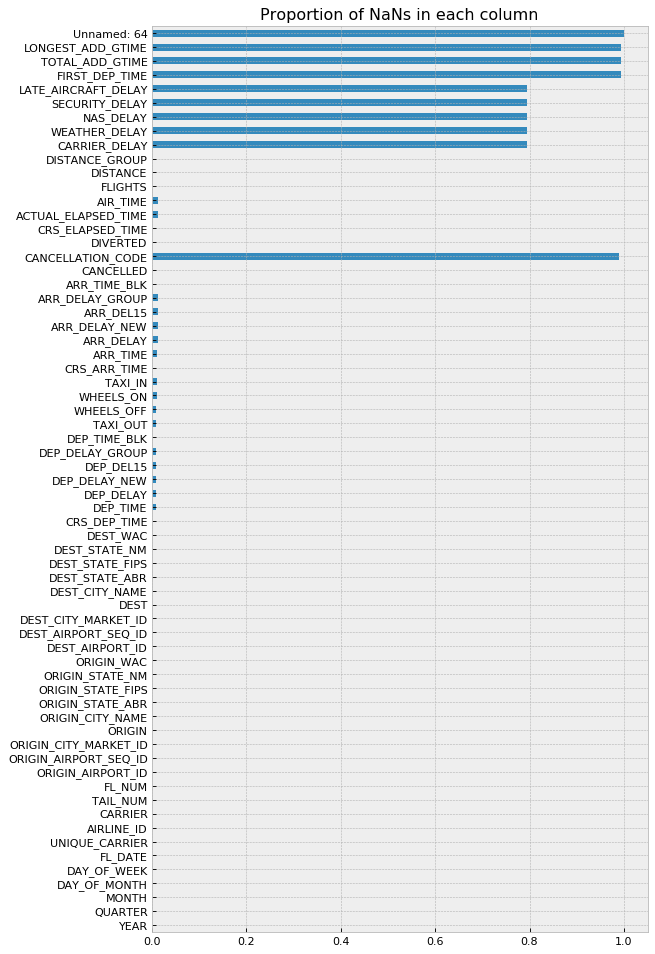

In [7]:
# affichage du nb de null pour chaque variable
plt.figure(figsize=(8, 15), dpi=80)
flightsDB.isnull().mean(axis=0).plot.barh()
plt.title("Proportion of NaNs in each column")

- Certaines colonnes contiennent beaucoup trop de valeurs manquantes, on pourra les supprimer : Unamed 64, LONGEST_ADD_GTIME, TOTAL_ADD_GTIME, FIRST_DEP_TIME, LATE_AIRCRAFT_DELAY, SECURITY_DELAY, NAS_DELAY, WEATHER_DELAY, CARRIER_DELAY, CANCELLATION_CODE

- D'autres features contiennent des valeurs vides mais qui sont minimes par rapport à la volumétrie totale de nos données

### Selection de variables pertinentes

**Choix des variables à conserver** :
- MONTH : le mois est important car on peut avoir des retards plus importants sur certains mois.
- DAY_OF_MONTH : Idem, certains jours du mois peuvent connaître plus de vols avec retard.
- DAY_OF_WEEK : Plus de vols certains jours de semaine, donc potentiellement plus de retard.
- UNIQUE_CARRIER : Permet d'identifier la compagnie.
- FL_NUM : Numéro de vol. Certain vols peuvent connaître régulièrement des retards.
- ORIGIN : Code de l'aéroport de départ. Important car il peut y avoir plus de problèmes (organisations, ...) dans certains aéroports qui peuvent connaître plus de fréquence de retards.
- DEST : Même raisonnement que la variable ORIGIN
- CRS_DEP_TIME : Heure de départ prévue. Peut influencer sur le retard.
- CRS_ARR_TIME: Heure d'arrivée prévue. Peut influencer sur le retard.
- DEP_DELAY = Retard au départ. Important pour notre modèle car va jouer sur le retard global d'un vol.
- ARR_DELAY : C'est notre target variable. Celle qu'on devra prédire.
- DISTANCE : la distance peut influencer aussi sur le retard.
- CRS_ELAPSED_TIME : Durée de vol prévue. La durée peut aussi influencer les retards.
- ACTUAL_ELAPSED_TIME : durée de vol réel. Influe directement sur le retard potentiel.
- DIVERTED : indique si le vol a été dévié. Un vol dévié aura forcément du retard.
- CANCELLED : si le vol est souvent annulé, il a des chances d'avoir souvent des retards. 
- FL_DATE  : information sur la date du vol

** Les variables non pertinentes **
- YEAR : toutes nos données concernent l'année 2016, la colonne YEAR n'apporte donc grand chose. On peut la supprimer.
- On ne conserve pas toutes les variables qui contiennent beaucoup de valeurs vides :  Unamed 64, LONGEST_ADD_GTIME, TOTAL_ADD_GTIME, FIRST_DEP_TIME, LATE_AIRCRAFT_DELAY, SECURITY_DELAY, NAS_DELAY, WEATHER_DELAY, CARRIER_DELAY, CANCELLATION_CODE
- Différentes variables pour identifier les aéroports. On ne garde que le code aéroport.
- Les variables qui contiennent les mêmes informations que d'autres mais sous une forme différentes (ex : DEP_DELAY_NEW, DEP_DELAI_15, ...
- Temps sur la piste ou heure opérations trains atterissages ne vont pas apporter grand chose pour prédire un retard (on a déjà l'heure de départ, la durée du vol, ...)



## 4. Chargement de l'ensemble des données

On charge l'ensemble des 12 fichers de l'année 2016

In [8]:
flightsDB = pd.DataFrame()
list_ = []
for file_ in datasets_path:
    df_ = pd.read_csv(file_,index_col=None, header=0,low_memory=False, error_bad_lines=False)
    list_.append(df_)
flightsDB = pd.concat(list_, ignore_index=True)

b'Skipping line 121012: expected 65 fields, saw 75\nSkipping line 386249: expected 65 fields, saw 83\nSkipping line 388291: expected 65 fields, saw 78\nSkipping line 389371: expected 65 fields, saw 72\nSkipping line 389548: expected 65 fields, saw 81\nSkipping line 453858: expected 65 fields, saw 97\n'


On ne garde que les colonnes que nous avons séléctionnées plus tôt.

In [9]:
relevant_var = ['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK','FL_DATE' ,'UNIQUE_CARRIER','FL_NUM','ORIGIN','DEST', \
                'CRS_DEP_TIME', 'CRS_ARR_TIME', 'ARR_DELAY','DEP_DELAY', 'DISTANCE', 'CRS_ELAPSED_TIME',\
                'ACTUAL_ELAPSED_TIME','DIVERTED', 'CANCELLED']

flightsDB=flightsDB[relevant_var].copy()

In [10]:
flightsDB.shape

(5635978, 17)

Notre base de données contiendra donc 17 features.

### Types des variables

In [11]:
flightsDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5635978 entries, 0 to 5635977
Data columns (total 17 columns):
MONTH                  int64
DAY_OF_MONTH           object
DAY_OF_WEEK            object
FL_DATE                object
UNIQUE_CARRIER         object
FL_NUM                 object
ORIGIN                 object
DEST                   object
CRS_DEP_TIME           float64
CRS_ARR_TIME           float64
ARR_DELAY              float64
DEP_DELAY              float64
DISTANCE               float64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
DIVERTED               float64
CANCELLED              float64
dtypes: float64(9), int64(1), object(7)
memory usage: 731.0+ MB


DAY_OF_MONTH et DAY_OF_WEEK sont des valeurs numériques. On va forcer le type pour ces 2 variables

In [12]:
flightsDB[['DAY_OF_MONTH', 'DAY_OF_WEEK']] = flightsDB[['DAY_OF_MONTH', 'DAY_OF_WEEK']].apply(pd.to_numeric, errors='coerce')

In [13]:
flightsDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5635978 entries, 0 to 5635977
Data columns (total 17 columns):
MONTH                  int64
DAY_OF_MONTH           float64
DAY_OF_WEEK            float64
FL_DATE                object
UNIQUE_CARRIER         object
FL_NUM                 object
ORIGIN                 object
DEST                   object
CRS_DEP_TIME           float64
CRS_ARR_TIME           float64
ARR_DELAY              float64
DEP_DELAY              float64
DISTANCE               float64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
DIVERTED               float64
CANCELLED              float64
dtypes: float64(11), int64(1), object(5)
memory usage: 731.0+ MB


### Valeurs vides 

In [14]:
# On compte le nombre de valeurs vides par colonne
print(flightsDB.isnull().sum())

MONTH                      0
DAY_OF_MONTH               1
DAY_OF_WEEK                1
FL_DATE                    0
UNIQUE_CARRIER             0
FL_NUM                     0
ORIGIN                     0
DEST                       1
CRS_DEP_TIME               0
CRS_ARR_TIME               3
ARR_DELAY              79781
DEP_DELAY              63539
DISTANCE                   5
CRS_ELAPSED_TIME          10
ACTUAL_ELAPSED_TIME    79783
DIVERTED                   4
CANCELLED                  3
dtype: int64


Le % de valeurs vides restent faibles par rapport à la volumétrie totale de nos données. <br/>
Nous faisons donc le choix de les supprimer.

In [15]:
flightsDB = flightsDB.dropna()

In [16]:
flightsDB.shape

(5556195, 17)

In [17]:
print(flightsDB.isnull().sum())

MONTH                  0
DAY_OF_MONTH           0
DAY_OF_WEEK            0
FL_DATE                0
UNIQUE_CARRIER         0
FL_NUM                 0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
CRS_ARR_TIME           0
ARR_DELAY              0
DEP_DELAY              0
DISTANCE               0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
DIVERTED               0
CANCELLED              0
dtype: int64


In [18]:
# On force les variables DAY et WEEK à int
flightsDB['DAY_OF_MONTH'] = flightsDB['DAY_OF_MONTH'].astype(int)
flightsDB['DAY_OF_WEEK'] = flightsDB['DAY_OF_WEEK'].astype(int)

### Description des variables

In [19]:
flightsDB.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTH,5556195.0,6.515621,3.413324,1.0,3.0,7.0,9.0,12.0
DAY_OF_MONTH,5556195.0,15.820589,8.801783,1.0,8.0,16.0,23.0,31.0
DAY_OF_WEEK,5556195.0,3.928162,1.984959,1.0,2.0,4.0,6.0,7.0
CRS_DEP_TIME,5556195.0,1330.303098,489.309015,1.0,915.0,1325.0,1735.0,2359.0
CRS_ARR_TIME,5556195.0,1490.415572,515.770284,1.0,1105.0,1520.0,1920.0,2400.0
ARR_DELAY,5556195.0,3.536409,41.922459,-152.0,-14.0,-6.0,6.0,2142.0
DEP_DELAY,5556195.0,8.917105,39.648485,-204.0,-5.0,-2.0,6.0,2149.0
DISTANCE,5556195.0,849.459273,618.882500,28.0,391.0,678.0,1091.0,4983.0
CRS_ELAPSED_TIME,5556195.0,145.332692,76.372027,18.0,88.0,126.0,178.0,705.0
ACTUAL_ELAPSED_TIME,5556195.0,139.951997,75.530098,14.0,84.0,121.0,173.0,778.0


- Nous ne voyons pas de valeurs aberrantes à première vue cependant nous remarquons que les retards peuvent aller jusqu'à 35 heures ce qui est énorme ! 
- DIVERTED et CANCELLED sont toujours à 0. On peut donc les supprimer

In [20]:
del flightsDB['DIVERTED']

In [21]:
del flightsDB['CANCELLED']

## 5. Feature engineering

#### Numéro de semaine

On ajoute une colonne numéro de semaine et voir comment cette donnée impacte les retards. Nous pensons que l'on peut avoir une augmentation des vols à certaine période de l'année et donc potentiellement plus de risque de retard.

In [54]:
# Retourne le numéro de semaine correspondant à la date
def getWeekNum(row):
    fl_date = datetime.datetime.strptime(row['FL_DATE'], '%Y-%m-%d')
    return fl_date.isocalendar()[1]

In [23]:
flightsDB['WEEK_NUM'] = flightsDB.apply(lambda row: getWeekNum(row), axis=1)

In [24]:
flightsDB.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,ARR_DELAY,DEP_DELAY,DISTANCE,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,WEEK_NUM
0,9,1,4,2016-09-01,AA,1,BOS,JFK,600.0,715.0,-23.0,-9.0,187.0,75.0,61.0,35
1,9,2,5,2016-09-02,AA,1,BOS,JFK,600.0,715.0,-6.0,-8.0,187.0,75.0,77.0,35
2,9,6,2,2016-09-06,AA,1,BOS,JFK,600.0,715.0,-19.0,-4.0,187.0,75.0,60.0,36
3,9,8,4,2016-09-08,AA,1,BOS,JFK,600.0,715.0,-27.0,-8.0,187.0,75.0,56.0,36
4,9,9,5,2016-09-09,AA,1,BOS,JFK,600.0,715.0,-21.0,-8.0,187.0,75.0,62.0,36


#### Proximité jours fériés

A la proximité des jours fériés, le nombre de vols augmentent et les risques de retard pourraient aussi augmenter. Il serait intéressant de rajouter cette donnée pour étudier son impact sur les retards.

In [25]:
# New Year day, Martin Luther King Jr. Day, Presidents' Day, Memorial Day
# Independence Day, Labor Day, Columbus Day, Veterans Day, 
# Thanksgiving, Christmas Day
holidays = [datetime.date(2016, 1, 1),datetime.date(2016, 1, 18),datetime.date(2016, 2, 15),datetime.date(2016, 5, 30),\
            datetime.date(2016, 7, 4),datetime.date(2016, 9, 5),datetime.date(2016,10, 10), datetime.date(2016, 11, 11),\
            datetime.date(2016, 11, 24), datetime.date(2016, 12, 25)]


# Retourne le nombre de jour à proximité d'un jour férié
def days_to_holidays(c_date):
    #c_date = datetime.datetime.strptime(row['FL_DATE'], '%Y-%m-%d').date()
    return np.min(np.abs(np.array(c_date) - np.array(holidays))).days    

In [26]:
fl_dates_s = flightsDB.FL_DATE.unique()
fl_unique_dates = [datetime.datetime.strptime(date, '%Y-%m-%d').date() for date in fl_dates_s]

In [27]:
vfunc = np.vectorize(days_to_holidays)
h_days = vfunc(fl_unique_dates)

In [28]:
hash_h_days = dict(zip(fl_dates_s, h_days))

In [29]:
flightsDB['H_DAYS'] = flightsDB.apply(lambda row: hash_h_days[row['FL_DATE']], axis=1)

In [30]:
flightsDB.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,ARR_DELAY,DEP_DELAY,DISTANCE,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,WEEK_NUM,H_DAYS
0,9,1,4,2016-09-01,AA,1,BOS,JFK,600.0,715.0,-23.0,-9.0,187.0,75.0,61.0,35,4
1,9,2,5,2016-09-02,AA,1,BOS,JFK,600.0,715.0,-6.0,-8.0,187.0,75.0,77.0,35,3
2,9,6,2,2016-09-06,AA,1,BOS,JFK,600.0,715.0,-19.0,-4.0,187.0,75.0,60.0,36,1
3,9,8,4,2016-09-08,AA,1,BOS,JFK,600.0,715.0,-27.0,-8.0,187.0,75.0,56.0,36,3
4,9,9,5,2016-09-09,AA,1,BOS,JFK,600.0,715.0,-21.0,-8.0,187.0,75.0,62.0,36,4


#### Heure de départ et d'arrivée

On ajoute 2 features qui contiennent l'heure de départ et d'arrivée sans les minutes pour simplifier les traitements.

In [31]:
flightsDB['ARR_HOUR'] = (flightsDB['CRS_ARR_TIME']/100).astype(int)
flightsDB['DEP_HOUR'] = (flightsDB['CRS_DEP_TIME']/100).astype(int)

#### Carrier_Code

Création d'une colonne contenant un code numérique correspondant à la compagnie. Permet de codifier ces variables catégorielles en numérique ce qui est nécessaire à certains algorithmes d'apprentissage.

In [32]:
flightsDB["UNIQUE_CARRIER"] = flightsDB["UNIQUE_CARRIER"].astype('category')
flightsDB["CARRIER_CODE"] = flightsDB["UNIQUE_CARRIER"].cat.codes

### Code aéroport

Création d'une colonne dans laquelle on transforme le code textuel des aéroports en code numérique

In [33]:
flightsDB["ORIGIN"] = flightsDB["ORIGIN"].astype('category')
flightsDB["ORIGIN_CODE"] = flightsDB["ORIGIN"].cat.codes

In [34]:
flightsDB["DEST"] = flightsDB["DEST"].astype('category')
flightsDB["DEST_CODE"] = flightsDB["DEST"].cat.codes

## 6. Analyse exploratoire

## Distribution des variables

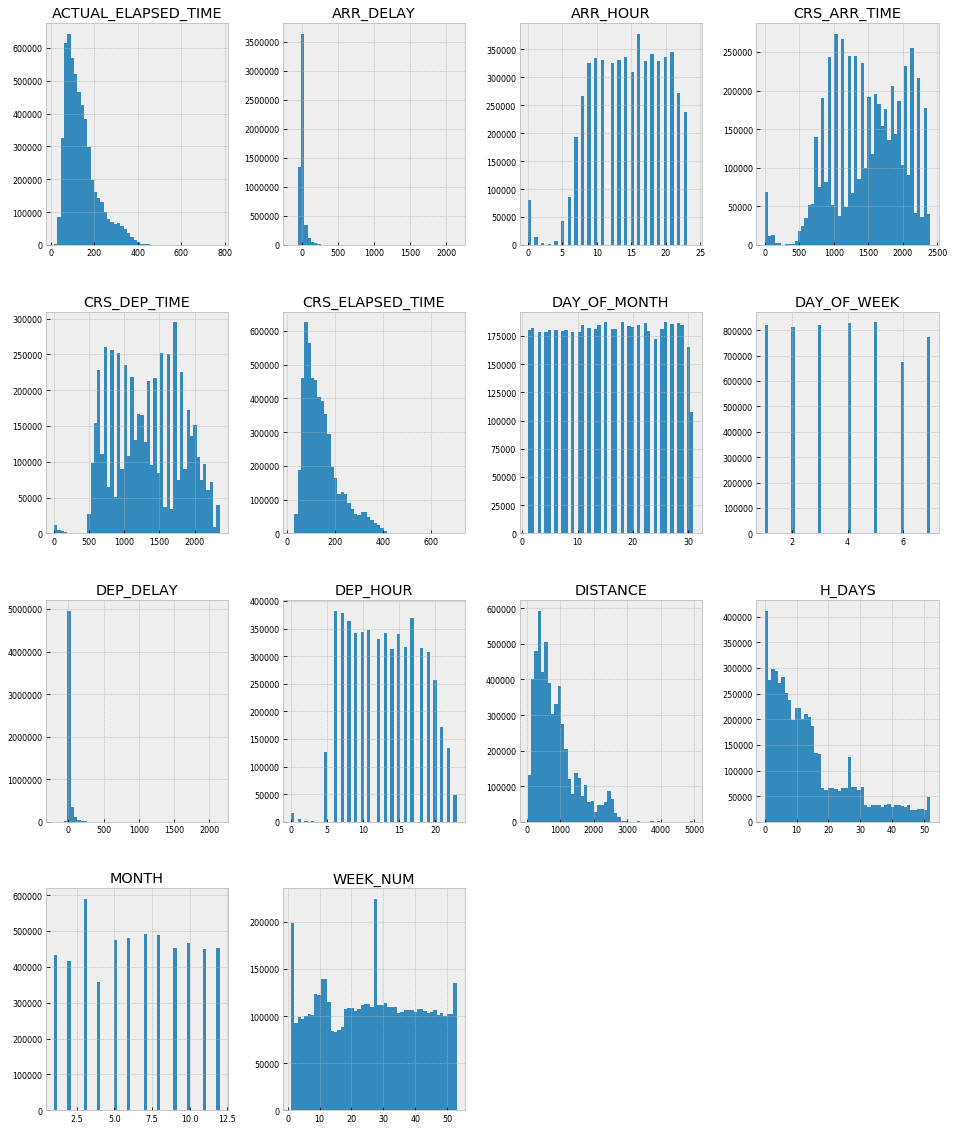

In [35]:
flightsDB_num = flightsDB.select_dtypes(include = ['float64', 'int64'])
flightsDB_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 

Quelques observations : 
    - On a un pic de trafic aérien au mois de Mars
    - Plus on est proche des jours de fêtes, plus on a des vols
    - On a très peu de vols entre minuit et 5h du matin
    - La majorité des vols arrivent à avec peu de retard ou sont en avance

### Target variable

L'objectif du projet étant d'implémenter un modèle de prédiction de retard d'un vol, nous avons considéré la variable cible : **ARR_DELAY** qui donne la différence en minute entre l'heure d'arrivée prévue et l'heure d'arrivée réelle.

Etudions cette variable.

count   5556195.000
mean          3.536
std          41.922
min        -152.000
25%         -14.000
50%          -6.000
75%           6.000
max        2142.000
Name: ARR_DELAY, dtype: float64


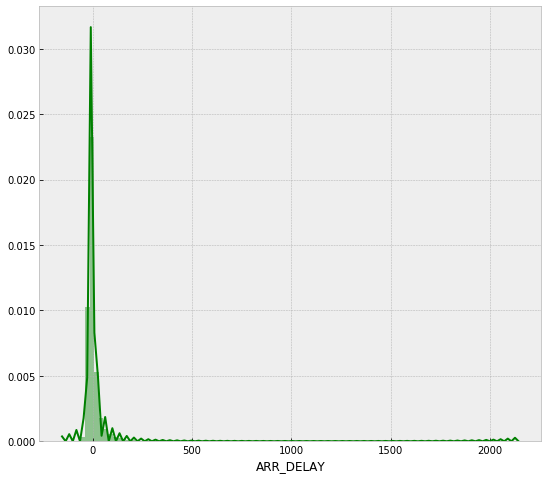

In [36]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(flightsDB['ARR_DELAY'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(flightsDB['ARR_DELAY'], color='g',bins=100);

+ On constate que les valeurs sont centrées autour de 0 
+ La moyenne est de 3 min et la médiane de -6 minutes
+ Nous voyons un nombre non négligeable de valeurs extrêmes.
+ L'essentiel des retards sont entre -50 min et 100 min mais nous avons une queue de distribution avec des valeurs extrêmes.

In [37]:
num_delayed = flightsDB[flightsDB['ARR_DELAY'] > 0]['ARR_DELAY'].count()
num_ontime = flightsDB[flightsDB['ARR_DELAY'] <= 0]['ARR_DELAY'].count()

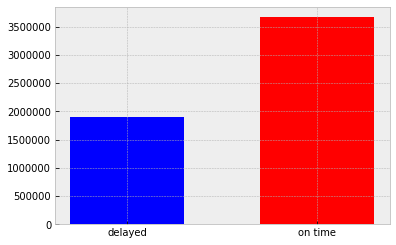

Retard = 34%
Avance ou à l'heure = 66%


In [38]:
retards = [['delayed',num_delayed], ['ontime',num_ontime]]
bars = ['delayed', 'ontime']
ax = plt.subplot(111)
ax.bar([0], num_delayed,width=0.6,color='b',align='center')
ax.bar([1], num_ontime,width=0.6,color='r',align='center')
plt.xticks([0,1], ['delayed','on time'])
plt.show()

total = num_ontime+num_delayed
print("Retard = {0:.0f}%".format(num_delayed/(total)*100))
print("Avance ou à l'heure = {0:.0f}%".format(num_ontime/(total)*100))

Nous constatons que les compagnies sont plutôt fiables en terme d'horaires car nous avons 2/3 des vols qui arrive à l'heure ou en avance.

### Distribution des retards par jour de semaine

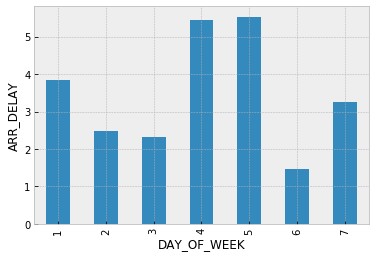

In [39]:
df = flightsDB.groupby(['DAY_OF_WEEK'])['ARR_DELAY'].mean()
ax =df.plot.bar()
ax.set_ylabel("ARR_DELAY")

=> 1 = Lundi et 7 = Dimanche<br/>
=> On constate un pic de retards le Jeudi et Vendredi<br/>
=> Globalement plus de retard le Lundi et Dimanche<br/>
=> Ce sont sûrement des départs en week-end<br/>
=> Samedi semble être le meilleur jour pour voyager

### Distribution des retards par numéro de semaine

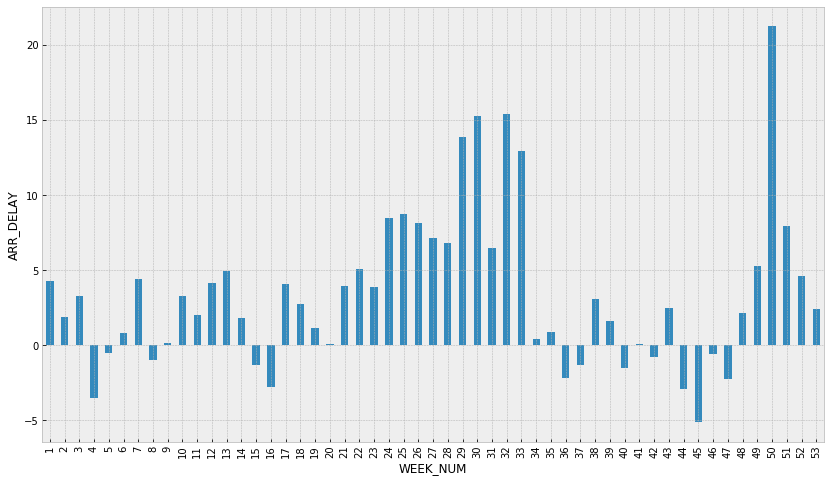

In [40]:
df = flightsDB.groupby(['WEEK_NUM'])['ARR_DELAY'].mean()
plt.figure(figsize=(14, 8))
ax =df.plot.bar()
ax.set_ylabel("ARR_DELAY")

=> Nous constatons un pic des retards pendant le mois de Décembre, Janvier => période vacances / fêtes mais aussi climat.<br/>
=> Idem pour les mois de Juin, Juillet Août => période de vacances<br/>
=> Il y a des semaines où les avions sont globalement en avance => Novembre

### Distribution des retards par mois

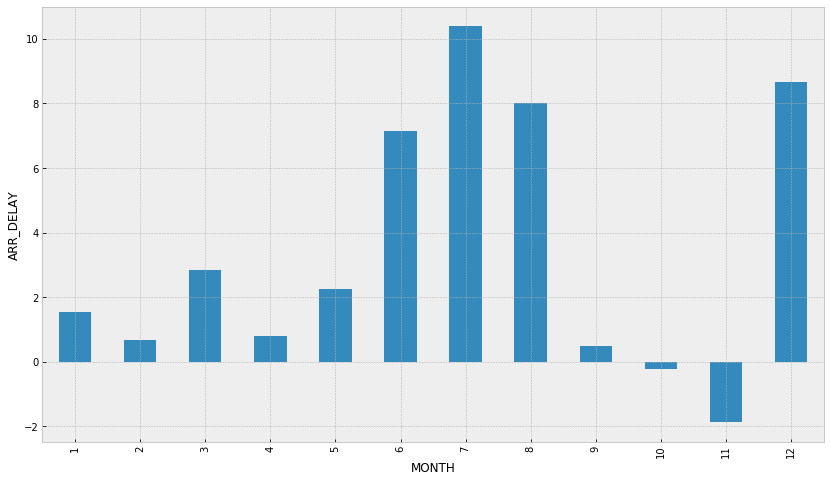

In [41]:
df = flightsDB.groupby(['MONTH'])['ARR_DELAY'].mean()
plt.figure(figsize=(14, 8))
ax =df.plot.bar()
ax.set_ylabel("ARR_DELAY")

=> Les mois qui connaissent le plus de retard : Juin, Juillet, Août et Décembre<br/>
=> Novembre est le mois où on a le plus de chance d'arriver à l'heure ou en avance

### Distribution des retards par heure

**Heure de départ**

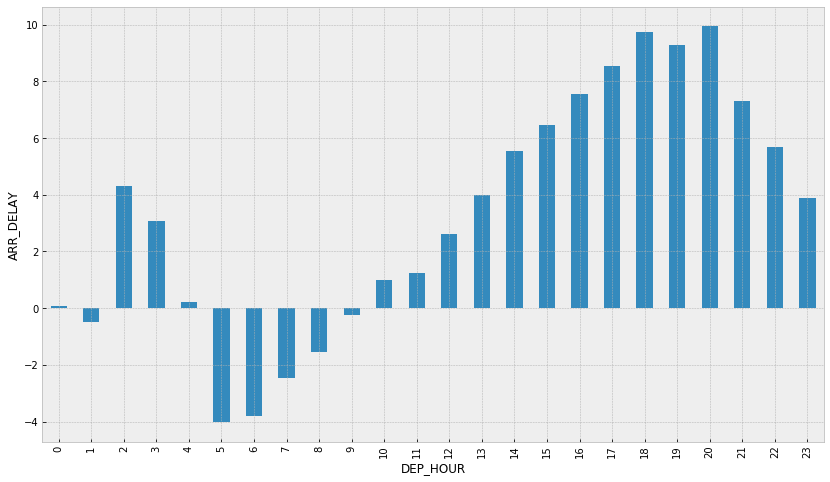

In [42]:
df = flightsDB.groupby(['DEP_HOUR'])['ARR_DELAY'].mean()
plt.figure(figsize=(14, 8))
ax =df.plot.bar()

ax.set_ylabel("ARR_DELAY")

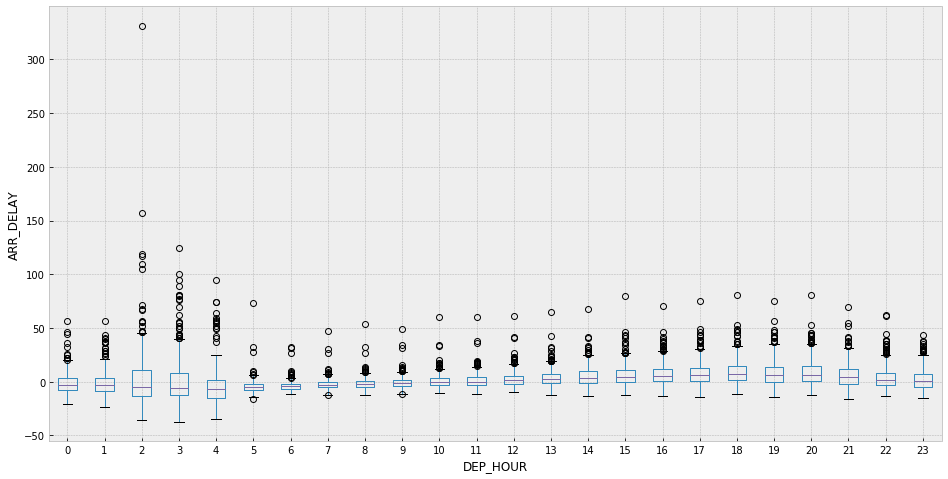

In [43]:
flight_dep_hour_pivots = flightsDB.pivot_table(index='FL_DATE', columns='DEP_HOUR', values='ARR_DELAY')
ax = flight_dep_hour_pivots.plot(kind='box', figsize=[16,8])
ax.set_ylabel("ARR_DELAY")
ax.set_xlabel("DEP_HOUR")

=> Nous avons beaucoup moins de retard le matin que l'après-midi et le soir<br/>
=> Pic de retards entre 17h et 20h<br/>
=> Il vaut mieux voyager très tôt le matin et éviter les horaires entre 15h et 22h pour arriver à l'heure.<br/>
=> Meilleur régularité entre 5h et 9h.

**Heure de d'arrivée**

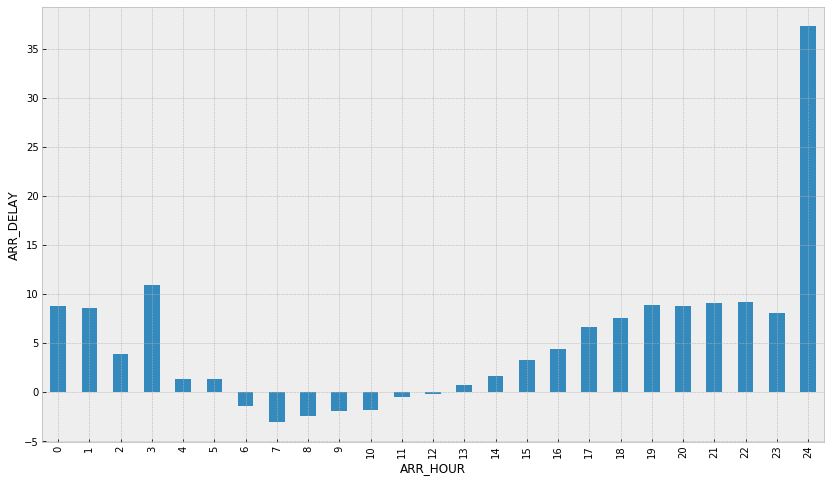

In [44]:
df = flightsDB.groupby(['ARR_HOUR'])['ARR_DELAY'].mean()
plt.figure(figsize=(14, 8))
ax =df.plot.bar()

ax.set_ylabel("ARR_DELAY")

=> Plus de retard si arrivée après 17h avec un pic à minuit

### Distribution des retards par proximité des vacances

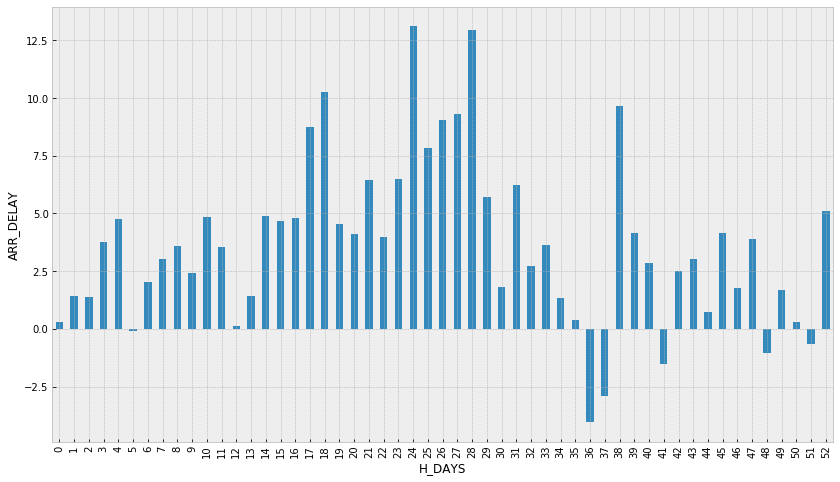

In [45]:
df = flightsDB.groupby(['H_DAYS'])['ARR_DELAY'].mean()
plt.figure(figsize=(14, 8))
ax =df.plot.bar()

ax.set_ylabel("ARR_DELAY")

On aurait pensé que la proximité des jours fériés ferait augmenter de beaucoup les retards. C'est en parti le cas mais nous avons surtout des pics entre 15j et 30j du jour férié. Il y a souvent des vacances autour des jours fériés. Cela doit expliquer ces pics.

### Retard par aéroport

On se focalise sur les 20 plus gros aéroports (par nb de vols)

In [46]:
volume_airports = flightsDB['ORIGIN'].value_counts()[:20].index.tolist()

In [47]:
flight_volume_airports = flightsDB[flightsDB['ORIGIN'].isin(volume_airports)]

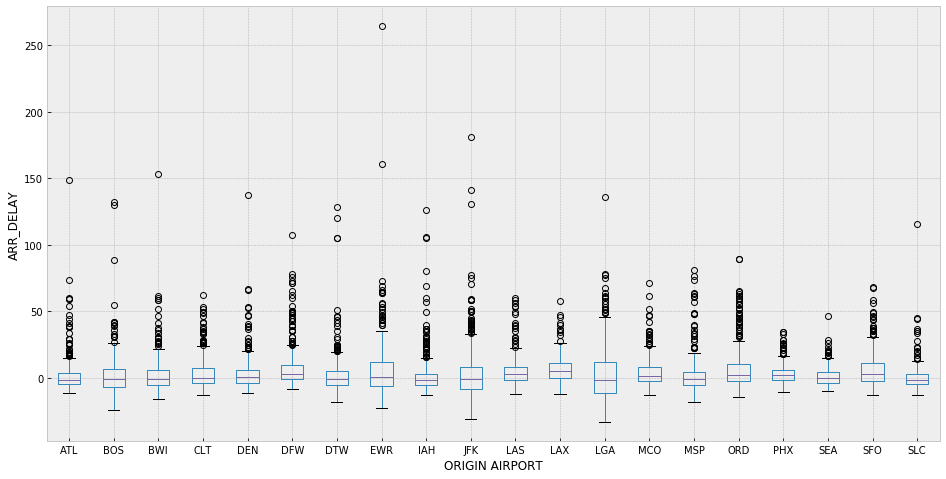

In [55]:
flight_volume_airports_pivots = flight_volume_airports.pivot_table(index='FL_DATE', columns='ORIGIN', values='ARR_DELAY')
ax = flight_volume_airports_pivots.plot(kind='box', figsize=[16,8])

ax.set_ylabel("ARR_DELAY")
ax.set_xlabel("ORIGIN AIRPORT")

On a plus de chance d'être en retard au départ des aéroport de Dallas (DFW), Las Vegas (LAX) ou Los Angeles (LGA).<br/>
On a plus de chance d'être à l'heure au départ de  Salt Lake City (SLC), Houston (IAH) ou Atlanta (ATL)

### Retard par compagnie aérienne

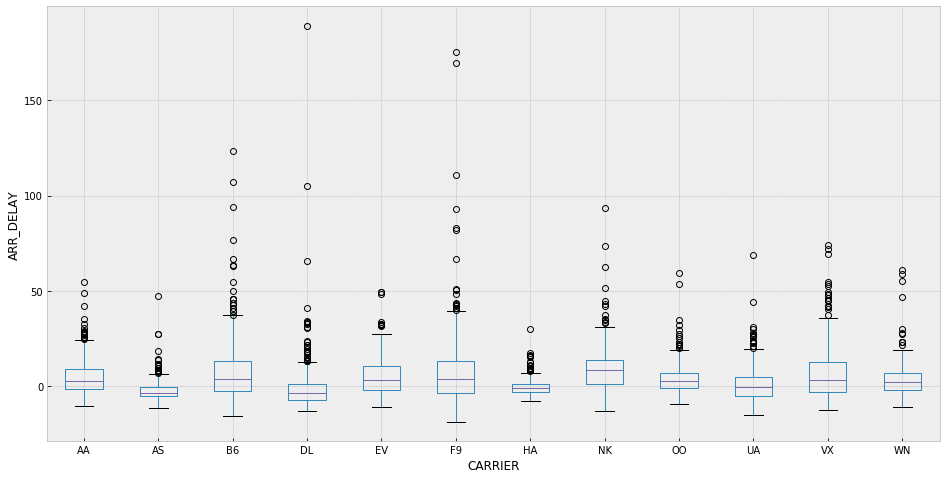

In [56]:
flight_volume_companies_pivots = flightsDB.pivot_table(index='FL_DATE', columns='UNIQUE_CARRIER', values='ARR_DELAY')
ax = flight_volume_companies_pivots.plot(kind='box', figsize=[16,8])

ax.set_ylabel("ARR_DELAY")
ax.set_xlabel("CARRIER")

- Alaska Airlines, Delta Airlines et Hawai Airlines sont plus fiables en terme de ponctualité
- Spirit Lines, South West et Virgin Lines sont plus en retard en moyenne
- Nous avons des valeurs extrêmes pour Frontier Lines et Delta Airlines

### Analyse des correlations

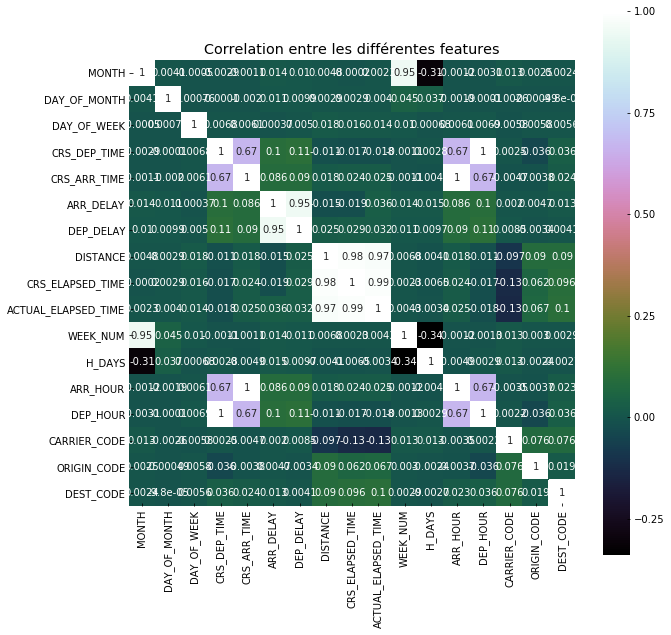

In [50]:
correlation = flightsDB.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation entre les différentes features')

In [51]:
correlation

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,CRS_ARR_TIME,ARR_DELAY,DEP_DELAY,DISTANCE,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,WEEK_NUM,H_DAYS,ARR_HOUR,DEP_HOUR,CARRIER_CODE,ORIGIN_CODE,DEST_CODE
MONTH,1.000,0.004,-0.001,-0.003,-0.001,0.014,0.010,0.005,-0.000,0.002,0.951,-0.311,-0.001,-0.003,0.013,0.002,0.002
DAY_OF_MONTH,0.004,1.000,0.001,-0.000,-0.002,0.011,0.010,0.003,0.003,0.004,0.045,0.037,-0.002,-0.000,-0.003,-0.000,-0.000
DAY_OF_WEEK,-0.001,0.001,1.000,0.007,0.006,0.000,0.005,0.018,0.016,0.014,0.010,0.001,0.006,0.007,-0.006,0.006,0.006
CRS_DEP_TIME,-0.003,-0.000,0.007,1.000,0.674,0.101,0.108,-0.011,-0.017,-0.018,-0.001,0.003,0.673,0.999,0.002,-0.036,0.036
CRS_ARR_TIME,-0.001,-0.002,0.006,0.674,1.000,0.086,0.090,0.018,0.024,0.025,-0.001,-0.005,0.999,0.673,-0.005,-0.004,0.024
ARR_DELAY,0.014,0.011,0.000,0.101,0.086,1.000,0.951,-0.015,-0.019,0.036,0.014,0.015,0.086,0.101,0.002,0.005,0.013
DEP_DELAY,0.010,0.010,0.005,0.108,0.090,0.951,1.000,0.025,0.029,0.032,0.011,0.010,0.090,0.108,0.009,-0.003,0.004
DISTANCE,0.005,0.003,0.018,-0.011,0.018,-0.015,0.025,1.000,0.985,0.974,0.007,-0.004,0.018,-0.011,-0.097,0.090,0.090
CRS_ELAPSED_TIME,-0.000,0.003,0.016,-0.017,0.024,-0.019,0.029,0.985,1.000,0.986,0.002,-0.006,0.024,-0.017,-0.128,0.062,0.096
ACTUAL_ELAPSED_TIME,0.002,0.004,0.014,-0.018,0.025,0.036,0.032,0.974,0.986,1.000,0.004,-0.003,0.025,-0.018,-0.133,0.067,0.103


=> Nous constatons une corrélation importante entre:
- **CRS_DEP_TIME** et **CRS_ARR_TIME**
- **CRS_DEP_TIME** et **DEP_HOUR**
- **ARR_DELAY** et **DEP_DELAY**
- **MONTH** et **WEEK_NUM**
- **CRS_ELAPSED_TIME** et **DISTANCE**
- **ACTUAL_ELAPSED_TIME** et **CRS_ELAPSED_TIME**
- **DEP_HOUR** et **ARR_HOUR**

- Nous pouvons supprimer CRS_DEP_TIME et CRS_ARR_TIME car nous avons créé de nouvelles features DEP_HOUR et DEP_TIME
- Nous pouvons supprimer DEP_DELAY qui est fortement corrélé avec ARR_DELAY
- Nous pouvons supprimer ACTUAL_ELAPSED_TIME,CRS_ELAPSED_TIME qui sont corrélés avec DISTANCE
- Nous voyons également une correlation entre DEP_HOUR et ARR_HOUR et dans la perspective des paramètres d'entrée de l'API, on peut considérer que DEP_HOUR sera suffisant. On va donc supprimer ARR_HOUR

In [52]:
del flightsDB["CRS_DEP_TIME"]
del flightsDB["CRS_ARR_TIME"]
del flightsDB["DEP_DELAY"]
del flightsDB["ACTUAL_ELAPSED_TIME"]
del flightsDB["CRS_ELAPSED_TIME"]
del flightsDB["ARR_HOUR"]

## 7. Sauvegarde de la base traitée

On sauve la base pour pouvoir ensuite appliquer des modèles de prédiction

In [53]:
flightsDB.to_csv('flightsDB.csv',index = False)
#flightsDB= pd.read_csv('flightsDB.csv')